In [70]:
import xarray as xr
from data_hunter_era5 import DataRetriver

%matplotlib inline
# import cartopy.crs as ccrs

In [71]:
def retrive_custom_data(startDate, endDate, properties, long_min, long_max, lat_min,lat_max):
    # [N,W,S,E]
    area = [lat_max, long_min, lat_min, long_max]
    return DataRetriver.retrive_data_xarray(startDate, endDate, properties, area)

In [72]:
def kelvin_to_celsius(ds):
    ds_arr = ds.mn2t - 273.15
    ds_arr.attrs['units'] = 'ºC'
    ds = xr.Dataset({"Near surface air temperature (C)'" : ds_arr })
    
    return ds

In [73]:
# global observed data

global_observed_data = retrive_custom_data(
    startDate='2019-11-24',
    endDate='2019-11-24',
    properties= ['minimum_2m_temperature_since_previous_post_processing'],
    long_min= -180, 
    long_max= 179, 
    lat_min= -90,
    lat_max= 90, )

for i in range(len(global_observed_data)):
    global_observed_data[i] = kelvin_to_celsius(global_observed_data[i])
    

File ./NetCDF_data/era5/minimum_2m_temperature_since_previous_post_processing_/90_-180_-90_179_/2019_11_24.nc already exist.
./NetCDF_data/era5/minimum_2m_temperature_since_previous_post_processing_/90_-180_-90_179_/2019_11_24.nc


In [74]:
def filter_with_coordinates(ds, long_min, long_max, lat_min, lat_max):
    
    ds_filtered = ds.sel(longitude=slice(long_min, long_max), latitude=slice(lat_max,lat_min))
    return ds_filtered


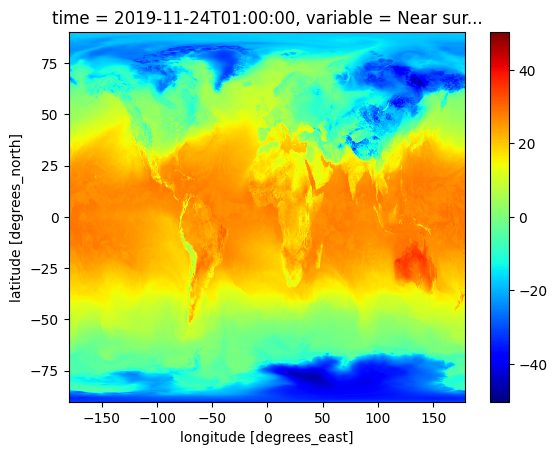

In [69]:
def plot_hourly_temperature(ds, day_hour):
    
    ds_timed = ds.isel(time=day_hour)
    ds_timed.to_array().plot(cmap='jet')
    
plot_hourly_temperature(global_observed_data[0], day_hour = 1)
# global_observed_data[0]